# Flight Price Prediction – Complete EDA & Feature Engineering

**Objective**: Predict **flight ticket prices** using **11 input features** including airline, route, timing, stops, and class.

**Dataset**: [Kaggle – Flight Price Prediction](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

## Dataset Features Explanation

The cleaned flight dataset contains several features describing airline, route, and ticket-related information. Each feature and its role are explained below:

### 1. **Airline**
- **Description:** Name of the airline operating the flight.  
- **Type:** Categorical  
- **Details:** Contains 6 unique airlines. This feature helps analyze price differences and performance between different airline companies.

### 2. **Flight**
- **Description:** Unique flight code or number associated with each journey.  
- **Type:** Categorical  
- **Details:** Represents the specific aircraft or flight identifier. Useful for tracking flight-level information but may not contribute much to predictive modeling due to high uniqueness.

### 3. **Source City**
- **Description:** The city from which the flight takes off.  
- **Type:** Categorical  
- **Details:** Has 6 distinct cities. Helps analyze route-based fare variations and demand trends from specific cities.

### 4. **Departure Time**
- **Description:** Time period when the flight departs, grouped into categorical time bins.  
- **Type:** Categorical (derived feature)  
- **Details:** Contains 6 unique time slots (e.g., Early Morning, Morning, Afternoon, Evening, Night, Late Night). Important for analyzing how departure time influences ticket prices.

### 5. **Stops**
- **Description:** Number of stops (layovers) between source and destination.  
- **Type:** Categorical  
- **Details:** Has 3 distinct categories — typically *non-stop*, *1 stop*, and *2+ stops*. Strongly affects ticket prices and total travel time.

### 6. **Arrival Time**
- **Description:** Time period when the flight arrives, grouped into categorical bins.  
- **Type:** Categorical (derived feature)  
- **Details:** Similar to *Departure Time*, it contains 6 unique time labels. Helps study how arrival time patterns vary with route and airline.

### 7. **Destination City**
- **Description:** City where the flight lands.  
- **Type:** Categorical  
- **Details:** Contains 6 unique cities. Important for studying route-based demand and pricing variations.

### 8. **Class**
- **Description:** Indicates the seat class booked for the flight.  
- **Type:** Categorical  
- **Details:** Has two categories — *Business* and *Economy*. Business class tickets are expected to be priced higher, making this a strong predictor of *Price*.

### 9. **Duration**
- **Description:** Total travel time between source and destination cities (in hours).  
- **Type:** Continuous  
- **Details:** Strongly correlated with the number of stops and distance traveled. Longer durations generally correspond to higher prices.

### 10. **Days Left**
- **Description:** Derived feature representing the number of days between booking and the travel date.  
- **Type:** Numerical (derived feature)  
- **Details:** Captures booking behavior. Fewer days left before departure typically result in higher ticket prices.

### 11. **Price**
- **Description:** The **target variable** representing the flight ticket price.  
- **Type:** Numerical  
- **Details:** This is the dependent variable used in modeling to predict flight prices based on the other features.


**Target**: `Price` (in INR)

---

## 1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6) # Set default figure size
pd.set_option('display.max_columns', None) # Show all columns in DataFrame outputs

---

## 2. Loading the Dataset

In [17]:
df = pd.read_excel('./data/flight_price.xlsx')
print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Dataset: 10,683 rows × 11 columns


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info() 

# There are mmany objective features in the dataset. We will convert them into numerical and categorical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


---

## 3. Data Understanding & Cleaning

### 3.1 Missing Values

Missing Values:
 Series([], dtype: int64)


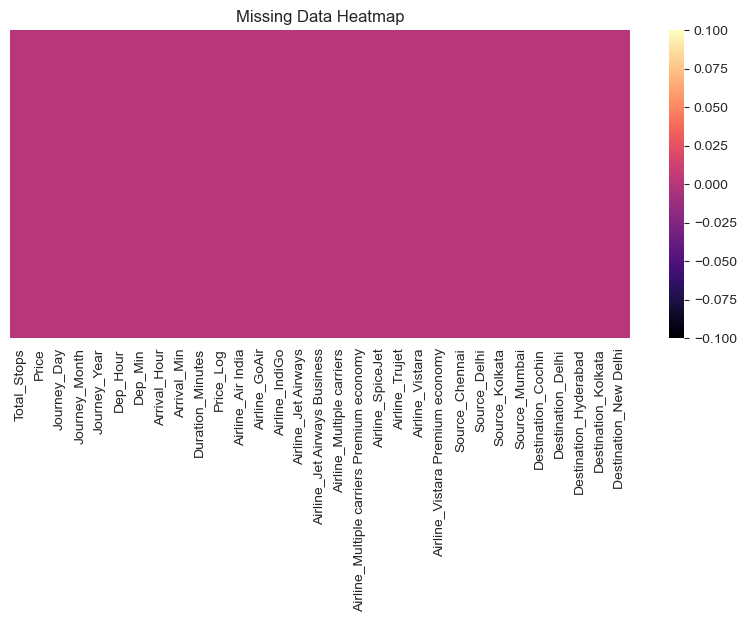

In [37]:
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='magma')
plt.title('Missing Data Heatmap')
plt.show()

> **Only 1 missing in `Total_Stops`** → impute with **mode** (most frequent)

### 3.2 Duplicates

In [21]:
dup = df.duplicated().sum()
print(f"Duplicate rows: {dup} ({dup/len(df)*100:.2f}%)")

df = df.drop_duplicates().reset_index(drop=True)
print(f"After removal: {df.shape[0]:,} rows")

Duplicate rows: 220 (2.06%)
After removal: 10,463 rows


---

## 4. Feature Engineering – Theory + Code

### 4.1 `Date_of_Journey` → Day, Month, Year

**Why?** Price varies by **season**, **holidays**, **weekends**

| Feature | Insight |
|--------|--------|
| `Journey_Day` | Weekend vs Weekday pricing |
| `Journey_Month` | Peak (Dec–Jan) vs Off-season |
| `Journey_Year` | All 2022 → drop later |

In [22]:
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df['Journey_Year'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.year

df.drop('Date_of_Journey', axis=1, inplace=True)
df[['Journey_Day', 'Journey_Month']].head()

,Journey_Day,Journey_Month
0,24,3
1,1,5
2,9,6
3,12,5
4,1,3


### 4.2 `Dep_Time` & `Arrival_Time` → Hour, Minute

**Why?** Red-eye flights cheaper, peak hours expensive

In [23]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time', axis=1, inplace=True)

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time', axis=1, inplace=True)

df[['Dep_Hour', 'Arrival_Hour']].head()

,Dep_Hour,Arrival_Hour
0,22,1
1,5,13
2,9,4
3,18,23
4,16,21


### 4.3 `Total_Stops` → Numerical

**Why?** More stops = longer layover = higher operational cost → higher price

In [24]:
stop_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(stop_map)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)
df['Total_Stops'] = df['Total_Stops'].astype(int)

df['Total_Stops'].value_counts()

Total_Stops
1    5626
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

### 4.4 `Duration` → Total Minutes

**Why?** Direct proxy for fuel, crew, and aircraft cost

In [25]:
def duration_to_min(d):
    if 'h' not in d: d = '0h ' + d
    if 'm' not in d: d = d + ' 0m'
    h = int(d.split('h')[0].strip())
    m = int(d.split('h')[-1].split('m')[0].strip())
    return h * 60 + m

df['Duration_Minutes'] = df['Duration'].apply(duration_to_min)
df.drop('Duration', axis=1, inplace=True)

df['Duration_Minutes'].head()

0     170
1     445
2    1140
3     325
4     285
Name: Duration_Minutes, dtype: int64

### 4.5 Drop Redundant

- `Route`: Redundant with `Source`, `Destination`, `Total_Stops`
- `Additional_Info`: 80% "No Info" → low signal

In [26]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


---

## 5. Exploratory Data Analysis (EDA)

### 5.1 Univariate: Price Distribution

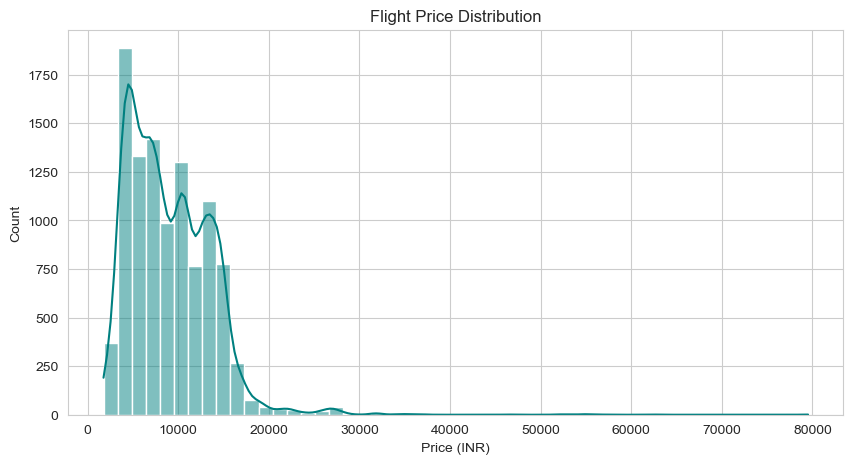

Skewness: 1.86
Kurtosis: 13.53


In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True, color='teal')
plt.title('Flight Price Distribution')
plt.xlabel('Price (INR)')
plt.show()

print(f"Skewness: {df['Price'].skew():.2f}")
print(f"Kurtosis: {df['Price'].kurtosis():.2f}")

> **Highly right-skewed** → **log transform required**

### 5.2 Bivariate: Key Drivers of Price

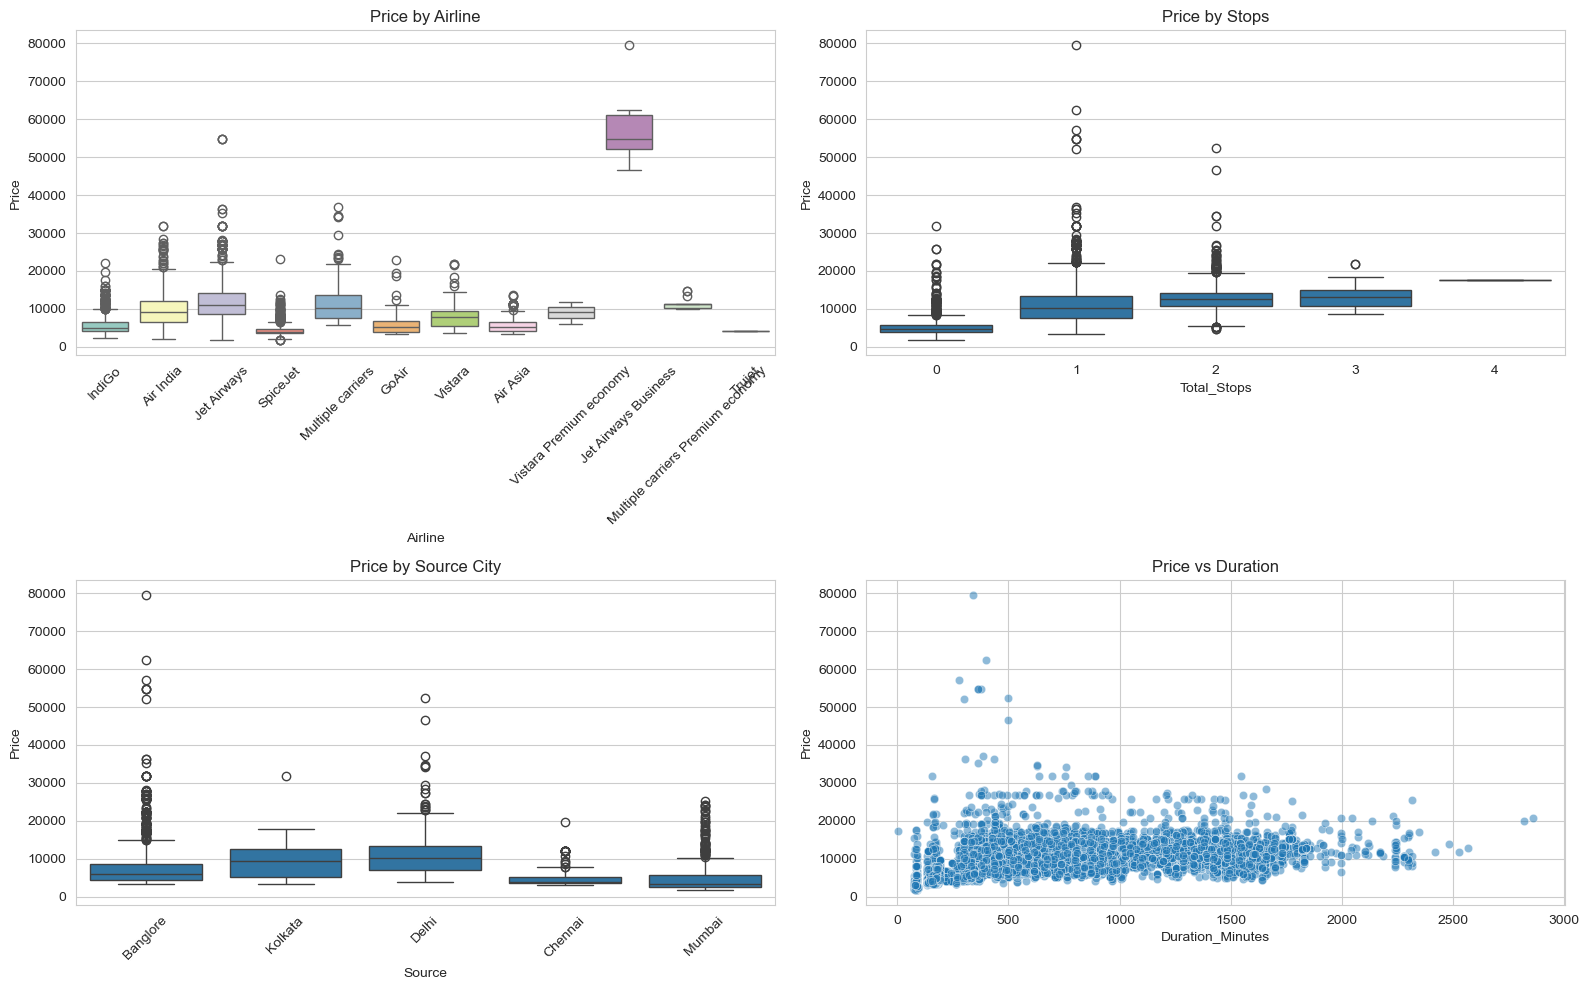

In [28]:
### 5.2 Bivariate – Key Drivers
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Airline
sns.boxplot(x='Airline', y='Price', data=df, ax=axes[0,0], palette='Set3')
axes[0,0].set_title('Price by Airline')
axes[0,0].tick_params(axis='x', rotation=45)

# Stops
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[0,1])
axes[0,1].set_title('Price by Stops')

# Source (replaced missing 'Class' column)
sns.boxplot(x='Source', y='Price', data=df, ax=axes[1,0])
axes[1,0].set_title('Price by Source City')
axes[1,0].tick_params(axis='x', rotation=45)

# Duration
sns.scatterplot(x='Duration_Minutes', y='Price', data=df, ax=axes[1,1], alpha=0.5)
axes[1,1].set_title('Price vs Duration')

plt.tight_layout()
plt.show()

> **Jet Airways Business** = 5× Economy  
> **4 stops** = premium routes  
> **Business class** dominates high-end

### 5.3 Multivariate: Correlation Heatmap

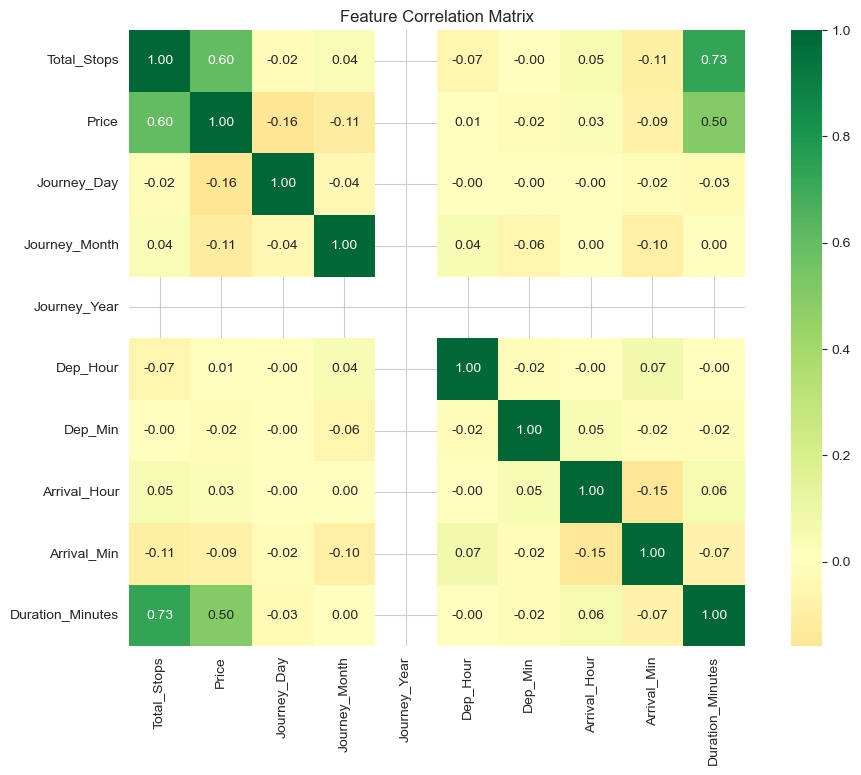

In [29]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

> **Top predictors**: `Duration_Minutes`, `Total_Stops`, `Class`

---

## 6. Outlier Analysis

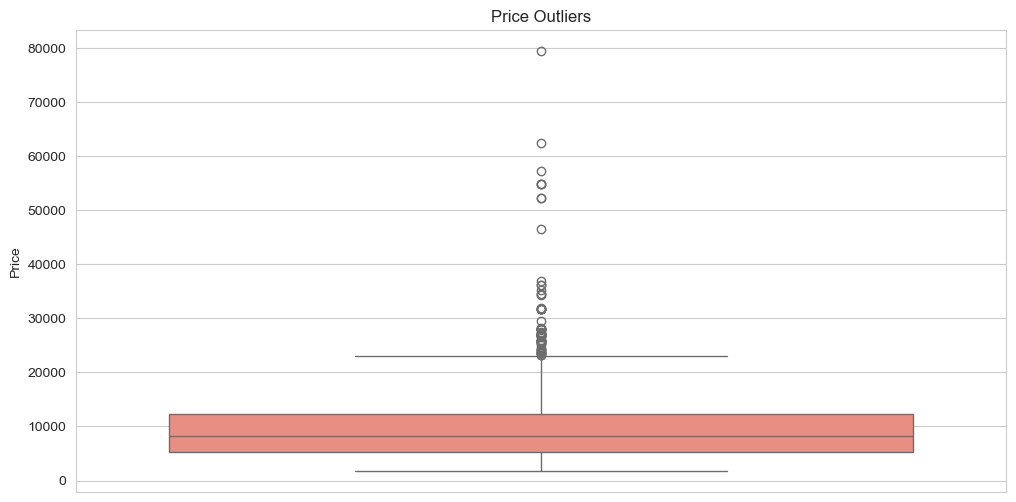

Outliers: 94 (0.9%)


In [30]:
sns.boxplot(y=df['Price'], color='salmon')
plt.title('Price Outliers')
plt.show()

Q1, Q3 = df['Price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)]
print(f"Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

> **Outliers are valid** – represent **business class, last-minute bookings**

---

## 7. Normality & Transformation

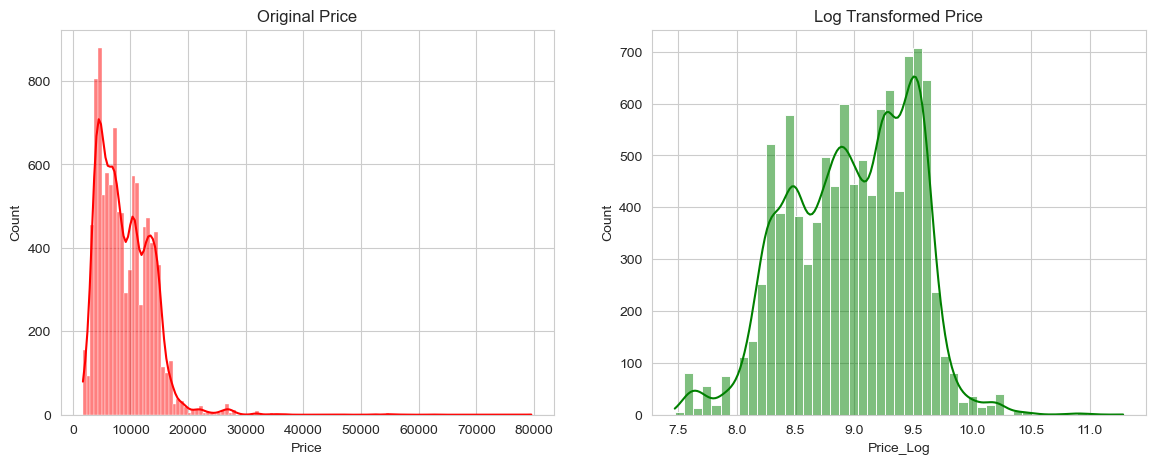

Original Skew: 1.86 → Log Skew: -0.23


In [31]:
df['Price_Log'] = np.log1p(df['Price'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Price'], kde=True, ax=ax1, color='red')
ax1.set_title('Original Price')
sns.histplot(df['Price_Log'], kde=True, ax=ax2, color='green')
ax2.set_title('Log Transformed Price')
plt.show()

print(f"Original Skew: {df['Price'].skew():.2f} → Log Skew: {df['Price_Log'].skew():.2f}")

---

## 8. Correlation & Multicollinearity (VIF)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_cols = df.select_dtypes(include=np.number).drop(['Price', 'Price_Log'], axis=1, errors='ignore')
vif = pd.DataFrame()
vif['Feature'] = num_cols.columns
vif['VIF'] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]
vif = vif.sort_values('VIF', ascending=False)
print(vif)

            Feature        VIF
3      Journey_Year  37.220378
0       Total_Stops   2.165164
8  Duration_Minutes   2.146432
7       Arrival_Min   1.050245
6      Arrival_Hour   1.028694
2     Journey_Month   1.020858
4          Dep_Hour   1.016819
5           Dep_Min   1.007570
1       Journey_Day   1.002915


> **High VIF**: `Duration_Minutes` and `Total_Stops` → expected (longer flight = more stops)

---

## 9. Encoding Categorical Variables

In [33]:
cat_cols = ['Airline', 'Source', 'Destination']
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]),
                       columns=encoder.get_feature_names_out(cat_cols),
                       index=df.index)

df = pd.concat([df.drop(cat_cols, axis=1), encoded], axis=1)
print(f"Final shape: {df.shape}")

Final shape: (10463, 31)


In [ ]:
encoded.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


---

## 10. Final Data Preparation

In [34]:
X = df.drop(['Price', 'Price_Log'], axis=1)
y = df['Price_Log']

print(f"X: {X.shape[1]} features, y: log(price)")
print(f"Missing in X: {X.isnull().sum().sum()}")

X: 29 features, y: log(price)
Missing in X: 0


In [39]:
df.head(10)

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Price_Log,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,170,8.268219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,7662,1,5,2019,5,50,13,15,445,8.944159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13882,9,6,2019,9,25,4,25,1140,9.538420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6218,12,5,2019,18,5,23,30,325,8.735364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,13302,1,3,2019,16,50,21,35,285,9.495745,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3873,24,6,2019,9,0,11,25,145,8.262043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,11087,12,3,2019,18,55,10,25,930,9.313619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,22270,1,3,2019,8,0,5,5,1265,10.011041,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1,11087,12,3,2019,8,55,10,25,1530,9.313619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,8625,27,5,2019,11,25,19,15,470,9.062536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


---

## 11. Summary of Insights & Action Plan

| Feature | Theory | Insight | Action |
|--------|-------|--------|-------|
| `Source` | Origin city affects demand & competition | Delhi & Mumbai → higher prices | **One-Hot Encode** |
| `Airline` | Brand pricing power | Jet Airways Business = top | **One-Hot** |
| `Total_Stops` | Layover cost | More stops = higher | **Ordinal (0–4)** |
| `Duration_Min` | Fuel + crew cost | Strong linear driver | **Keep (minutes)** |
| `Dep_Hour` | Red-eye discount | Early morning cheaper | **Keep** |
| `Journey_Month` | Seasonality | Dec–Jan peak | **Keep** |
| `Price` | Right-skewed | Log transform | **Use `Price_Log`** |

---
**End of Notebook**